In [1]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import torch
import pickle
import tifffile

In [2]:
# crop stitched dataset based on volume size (in pixels) and volume center

directory = "/media/share11/Nick_D/20210224_17_33_02_Kaoru136_15x_488LP40_561LP40_642LP70/Ex_642_Em_2_destriped_stitched_downsampled2x"

def tiff_cropper(x, y, z, x_range, y_range, z_range, directory):
    
    z_stack_list = os.listdir(directory)
    z_stack_cropped = z_stack_list[int(z - z_range/2):int(z + z_range/2)]
    
    subvolume_list = []
       
    for image_name in z_stack_cropped:
        path = os.path.join(directory, image_name)
        img = tifffile.imread(path)
        subvolume_list.append(img)
    
    subvolume = np.dstack(subvolume_list)
    subvolume = subvolume[int(x - x_range/2):int(x + x_range/2), int(y - y_range/2):int(y + y_range/2), :]

    #print(subvolume.shape)
    
    return(subvolume)


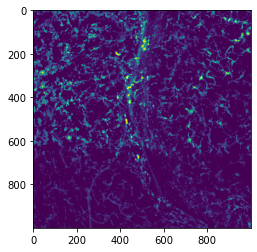

In [3]:
def max_projection(subvolume, range_min, range_max):

    subvolume = np.clip(subvolume, range_min, range_max) / (range_max - range_min)

    img2dmp = np.max(subvolume, 2)
    plt.imshow(img2dmp)

subvolume = tiff_cropper(1600, 1800, 600, 1000, 1000, 200, directory)
max_projection(subvolume, 500, 1500)